In [1]:
!#/usr/bin/python3

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np 

pd.__version__

'1.4.2'

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
alcohol = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv', 
            usecols=['country', 'wine_servings'], index_col='country', squeeze=True)

/var/folders/wr/xcz5m33x6c95ksqpy1nx49hh0000gn/T/ipykernel_16954/3478693128.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv',


In [6]:
type(alcohol)

alcohol.head()

pandas.core.series.Series

country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
Name: wine_servings, dtype: int64

In [7]:
# Series sizing with .size, .shape, and len()

alcohol.size

193

In [8]:
alcohol.values

array([  0,  54,  14, 312,  45,  45, 221,  11, 212, 191,   5,  51,   7,
         0,  36,  42, 212,   8,  13,   0,   8,   8,  35,  16,   1,  94,
         7,   0,   7,  16,   1,   4, 100,   1,   1, 172,   8,   3,   1,
         9,  74,  11, 254,   5, 113, 134,   0,   1, 278,   3,  26,   9,
         3,   1,   2, 233,   0,  59,   0,   1,  97, 370,  59,   1, 149,
       175,  10, 218,  28,   2,   2,  21,   1,   1,   2, 185,  78,   0,
         0,   0,   0, 165,   9, 237,   9,  16,   1,  12,   2,   1,   0,
         6, 123,  62,  31,   0,   2,   0,  56, 271,   4,   1,   0,   0,
         1, 120,   0,   0,  18,   5,  18,   0,   8, 128,  10,   5,   0,
         1,   8,   0, 190, 175,   1,   1,   2,   7, 129,   1,   0,  23,
        18,   1,  74,  21,   1,  56, 339,   7,   9,  18, 167,  73,   0,
        32,  71,  11,  24,   0, 140,   0,   7, 127,  51,   2,  11, 116,
       276,   1,   0,  81, 112,   0,   0,   7,   2, 186, 280,  16,   0,
         1,  86,   4,  19,   5,   7,  20,   7,  32,   9,   0,  4

In [9]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [10]:
alcohol.index.size == alcohol.values.size

True

In [11]:
alcohol.shape
# returns a tuple

(193,)

In [12]:
len(alcohol)

# len and size are the same for series
# size is pandas specific
# length is Python built-in

193

In [13]:
# Unique values and Series monotonicity

alcohol.head()


country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
Name: wine_servings, dtype: int64

In [14]:
# Unique values and Series monotonicity

# checks if the series contains a sequence of unique values

alcohol.is_unique

False

In [15]:
# The first five records are a unique sequence of values

alcohol.head().is_unique

True

In [16]:
# Count of unique values in the sequence 
alcohol.nunique()

alcohol.nunique(dropna=True)

79

79

In [17]:
# monotonicity - function preserves a given order
# e.g. always increasing or always decreasing 

pd.Series([1,2,3]).is_monotonic

pd.Series([1,2,3,3,3,3,4]).is_monotonic

pd.Series([1,2,3,4,55,67,78,100]).is_monotonic

pd.Series([1,2,3,5,9,8,99.9]).is_monotonic

True

True

True

False

In [18]:
pd.Series(reversed([1,2,3,3,4,4,10,79,199])).is_monotonic_decreasing

pd.Series(reversed([1,2,3,3,4,4,10,79,199])).is_monotonic_increasing

True

False

In [19]:
# Count - returns only count of non-NA values

alcohol.size

alcohol.count()

193

193

In [20]:
alcohol.hasnans 

False

In [21]:
# Assessing and Counting NAs

# Returns boolean value True if value is null

alcohol.isnull()

# Only countries with missing wine_servings data are selected
# Since there are no missing values, no output is displayed

alcohol[alcohol.isnull()]

alcohol[alcohol.isnull()].index

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

Series([], Name: wine_servings, dtype: int64)

Index([], dtype='object', name='country')

In [22]:
type(alcohol[alcohol.isnull()].index)

# isolating the nulls
# boolean masking 
# then getting index from boolean masks

list(alcohol[alcohol.isnull()].index)

len(list(alcohol[alcohol.isnull()].index))

# Is there is a non-cumbersome approach for this?

pandas.core.indexes.base.Index

[]

0

In [23]:
# Pandorable solution - Pandas + adorable

alcohol.isnull().sum()

# Booleans are integers in Python, True = 1 and False=0
# Example

sum([True, False, True])

0

2

In [24]:
# Another approach

# Sequential - apply function to values in a sequence 
# Veccotrized - apply function to series all at once

# ufunc --> Universal function

np.isnan


<ufunc 'isnan'>

In [25]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [26]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [27]:
# Pandas has really good interoperability with numpy

alcohol[np.isnan].size

0

In [28]:
# notnull() and notna()

alcohol.notnull() # --> returns a boolean mask

alcohol[alcohol.notnull()] 
alcohol.loc[alcohol.notnull()]

country
Afghanistan    True
Albania        True
Algeria        True
Andorra        True
Angola         True
               ... 
Venezuela      True
Vietnam        True
Yemen          True
Zambia         True
Zimbabwe       True
Name: wine_servings, Length: 193, dtype: bool

country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
              ... 
Venezuela        3
Vietnam          1
Yemen            0
Zambia           4
Zimbabwe         4
Name: wine_servings, Length: 193, dtype: int64

country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
              ... 
Venezuela        3
Vietnam          1
Yemen            0
Zambia           4
Zimbabwe         4
Name: wine_servings, Length: 193, dtype: int64

In [29]:
alcohol.isnull().sum()
# same as -- in this case
alcohol.isna().sum()


alcohol.notnull().sum()
# same as 
alcohol.count()
# because count() method only cosiders non-NA 

0

0

193

193

In [30]:
# Booleans are literal numbers in Python 
# True = 1, False = 0 or essentially anything other than 1

# Example
True + True + False

True + True + False - True * 3


2

-1

In [31]:
# mro - method resolution order

bool.__mro__

(bool, int, object)

In [32]:
# Skill Challenge

# 1. Isolate the non-null in the alcohol series and assign them to the variable wine_servings

wine_servings = alcohol[alcohol.notnull()]
wine_servings.head()


# 2. What is the total wine consumed by countries in wine_servings?

wine_servings.sum()

# 3. What is the total wine consumed by countries that consumed less than 100 servings?

wine_servings[wine_servings<100].sum()



country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
Name: wine_servings, dtype: int64

9544

2319

In [33]:
# dropna() and fillna()

# dropna()
# excludes nulls, but does so without replacing the original
alcohol.dropna()

# modifies the original series
alcohol.dropna(inplace=True)

country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
              ... 
Venezuela        3
Vietnam          1
Yemen            0
Zambia           4
Zimbabwe         4
Name: wine_servings, Length: 193, dtype: int64

In [34]:
# fillna()

# fills NaNs without modifying the original
alcohol.fillna(100, inplace=False)

# fills NaNs and modifies original
# inplace parameters is False by default
alcohol.fillna(100, inplace=True)


country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
              ... 
Venezuela        3
Vietnam          1
Yemen            0
Zambia           4
Zimbabwe         4
Name: wine_servings, Length: 193, dtype: int64

In [35]:
# Descriptive Statistics

# Sum of wine servings across all countries 
alcohol.sum()

# Number of non-null rows
alcohol.count()

9544

193

In [36]:
# Average or Mean
alcohol.sum()/alcohol.count()

alcohol.mean()

49.45077720207254

49.45077720207254

In [37]:
# Median

alcohol.median()

alcohol.quantile(q=.5)

8.0

8.0

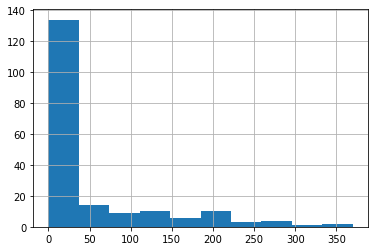

In [38]:
# Skew 
# Mean is so much higher than median
# Wine servings is positively skewed

# Indicates that there countries with large values 
# that skew the distribution to the left 

alcohol.hist();

In [39]:
# IQR - the difference between the first and third quartiles

iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

58.0

In [40]:
alcohol.min()
alcohol.max()

0

370

In [41]:
# Std Dev - square root of the variance
alcohol.std()

# Variance 
alcohol.var()


alcohol.std()**2 == alcohol.var()

79.6975984576301

6351.707199913643

False

In [42]:
# All the above could be achieved using
# describe() method

alcohol.describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: wine_servings, dtype: float64

In [43]:
# Statistics of data in that quartile range
alcohol.describe(percentiles=[.79,.19])

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
19%        1.000000
50%        8.000000
79%       83.040000
max      370.000000
Name: wine_servings, dtype: float64

In [44]:
alcohol.describe(percentiles=[.79,.19], include=float, exclude=object)

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
19%        1.000000
50%        8.000000
79%       83.040000
max      370.000000
Name: wine_servings, dtype: float64

In [45]:
# mode - value with highest frequency

alcohol.mode()

0    0
Name: wine_servings, dtype: int64

In [46]:
alcohol[alcohol == 1].size

25

In [47]:
alcohol.value_counts()
# same as
alcohol.value_counts(sort=True, ascending=False, dropna=True, normalize=False)

0      31
1      25
2       9
7       9
8       7
       ..
78      1
165     1
237     1
12      1
220     1
Name: wine_servings, Length: 79, dtype: int64

0      31
1      25
2       9
7       9
8       7
       ..
78      1
165     1
237     1
12      1
220     1
Name: wine_servings, Length: 79, dtype: int64

In [48]:
alcohol.value_counts(normalize=True)
# count of values / number of non-null values

# Relative frequencies
# Value 0 represents 16% of all values
# Value 1 represents 12.95% of all values

0      0.160622
1      0.129534
2      0.046632
7      0.046632
8      0.036269
         ...   
78     0.005181
165    0.005181
237    0.005181
12     0.005181
220    0.005181
Name: wine_servings, Length: 79, dtype: float64

In [49]:
# idxmax() and idxmin()

# Get index of the max value
alcohol[alcohol == alcohol.max()].index[0]

# same as
alcohol.idxmax()

# To get the value with the max value
alcohol[alcohol.idxmax()]

# However the idxmax() returns only the top value 
# Then
alcohol[alcohol == alcohol.max()]



'France'

'France'

370

country
France    370
Name: wine_servings, dtype: int64

In [50]:
# Get index of the min value

# Get index of the min value
alcohol[alcohol == alcohol.min()].index[0]

# same as
alcohol.idxmin()

# However the idxmin() retuns only the top value when order is sorted
alcohol[alcohol == alcohol.min()]

'Afghanistan'

'Afghanistan'

country
Afghanistan         0
Bangladesh          0
Bhutan              0
Burundi             0
North Korea         0
Eritrea             0
Ethiopia            0
India               0
Indonesia           0
Iran                0
Iraq                0
Kuwait              0
Lesotho             0
Libya               0
Malaysia            0
Maldives            0
Marshall Islands    0
Mauritania          0
Monaco              0
Myanmar             0
Nepal               0
Pakistan            0
Rwanda              0
San Marino          0
Saudi Arabia        0
Somalia             0
Sri Lanka           0
Sudan               0
Tajikistan          0
Uganda              0
Yemen               0
Name: wine_servings, dtype: int64

In [51]:
# Sorting with sort_values()

alcohol.sort_values()

alcohol.sort_values(ascending=False, na_position='last') # Sorts reverse


country
Afghanistan           0
Burundi               0
Myanmar               0
Mauritania            0
Marshall Islands      0
                   ... 
Denmark             278
Switzerland         280
Andorra             312
Portugal            339
France              370
Name: wine_servings, Length: 193, dtype: int64

country
France         370
Portugal       339
Andorra        312
Switzerland    280
Denmark        278
              ... 
Iran             0
Sri Lanka        0
Pakistan         0
Indonesia        0
Afghanistan      0
Name: wine_servings, Length: 193, dtype: int64

In [52]:
# We can specify the sorting algorithm

alcohol.sort_values(ascending=False, na_position='last', kind='quicksort') # mergesort, heapsort

country
France         370
Portugal       339
Andorra        312
Switzerland    280
Denmark        278
              ... 
Iran             0
Sri Lanka        0
Pakistan         0
Indonesia        0
Afghanistan      0
Name: wine_servings, Length: 193, dtype: int64

In [53]:
# modifies original series without creating a copy
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=True) 

In [54]:
# nlargest() and nsmallest()

# Example: get top 10 wine consuming countries

alcohol.sort_values(ascending=False)[:10]

# Pandorable way
alcohol.nlargest(n=10)


country
France               370
Portugal             339
Andorra              312
Switzerland          280
Denmark              278
Slovenia             276
Luxembourg           271
Croatia              254
Italy                237
Equatorial Guinea    233
Name: wine_servings, dtype: int64

country
France               370
Portugal             339
Andorra              312
Switzerland          280
Denmark              278
Slovenia             276
Luxembourg           271
Croatia              254
Italy                237
Equatorial Guinea    233
Name: wine_servings, dtype: int64

In [55]:
alcohol.nsmallest(5)
# better alterative than sorting a series

country
Bhutan        0
Eritrea       0
Ethiopia      0
Burundi       0
Bangladesh    0
Name: wine_servings, dtype: int64

In [56]:
# Sorting with sort_index()

alcohol.head()
# Currently series is sorted in descending order

country
France         370
Portugal       339
Andorra        312
Switzerland    280
Denmark        278
Name: wine_servings, dtype: int64

In [57]:
alcohol.sort_index()

alcohol.sort_index(ascending=False, na_position='first')

country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
              ... 
Venezuela        3
Vietnam          1
Yemen            0
Zambia           4
Zimbabwe         4
Name: wine_servings, Length: 193, dtype: int64

country
Zimbabwe         4
Zambia           4
Yemen            0
Vietnam          1
Venezuela        3
              ... 
Angola          45
Andorra        312
Algeria         14
Albania         54
Afghanistan      0
Name: wine_servings, Length: 193, dtype: int64

In [58]:
alcohol.index.isnull().sum()

0

In [59]:
alcohol.head()

country
France         370
Portugal       339
Andorra        312
Switzerland    280
Denmark        278
Name: wine_servings, dtype: int64

In [60]:
# sort_values() - returns a new series, sorted by values

# sort_index() - returns a new series, sorted by index labels

# parameters: ascending = True, inplace=False, na_position='last', sort='quicksort'

In [61]:
# Skills Challenge

# 1. Select all the countries from alcohol that have more than 
#    50 wine servings and save them (and the corresponding values)
#    in a variable fifty_plus

fifty_plus = alcohol[alcohol > 50]
fifty_plus.head()
fifty_plus.count()

# 2. From fifty_plus, choose the countries with the smallest 20 wine
#    serving values.

fifty_plus.nsmallest(n=20)

# 3. Mean, median, and standard deviation of sample from step 2

fifty_plus.nsmallest(20).describe()

fifty_plus.nsmallest(20).mean()

fifty_plus.nsmallest(20).median()

fifty_plus.nsmallest(20).std()

country
France         370
Portugal       339
Andorra        312
Switzerland    280
Denmark        278
Name: wine_servings, dtype: int64

55

country
Bahamas                51
Seychelles             51
Albania                54
Lithuania              56
Poland                 56
Gabon                  59
Estonia                59
Latvia                 62
St. Lucia              71
Russian Federation     73
Cook Islands           74
Paraguay               74
Iceland                78
South Africa           81
USA                    84
Macedonia              86
Bulgaria               94
Finland                97
Canada                100
Spain                 112
Name: wine_servings, dtype: int64

count     20.000000
mean      73.600000
std       17.866169
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      112.000000
Name: wine_servings, dtype: float64

73.6

73.5

17.866169147301836

In [62]:
# Series Arithemetics and fill_value()

# Add 2 to every value - vectorized
alcohol + 2

country
France         372
Portugal       341
Andorra        314
Switzerland    282
Denmark        280
              ... 
Iran             2
Sri Lanka        2
Pakistan         2
Indonesia        2
Afghanistan      2
Name: wine_servings, Length: 193, dtype: int64

In [63]:
alcohol.sort_index(inplace=True)
alcohol.head()

country
Afghanistan      0
Albania         54
Algeria         14
Andorra        312
Angola          45
Name: wine_servings, dtype: int64

In [64]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10})
alcohol + more_drinks
# Only gives overlapping index values

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [65]:
# Instead 

alcohol.add(more_drinks, fill_value=0)
# Fills 0 value for NaN values, and merges both Series

Afghanistan      0.0
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            0.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [66]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan      0.0
Albania         48.0
Algeria          4.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            0.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [67]:
alcohol.divide(more_drinks, fill_value=1)

Afghanistan      0.0
Albania          9.0
Algeria          1.4
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            0.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [68]:
alcohol.multiply(more_drinks, fill_value=1)

Afghanistan      0.0
Albania        324.0
Algeria        140.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            0.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [69]:
# Variance and Standard Deviation

# Variance - average of squared differences from the mean
# Std Dev - square root of variance

(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

# same as 
alcohol.var()

# Std Dev 

np.sqrt((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))
alcohol.std()


6351.707199913643

6351.707199913643

79.6975984576301

79.6975984576301

In [70]:
## Cumulative Operations